# Sonderübung 2

## Aufgabe 1
Gegeben sei das Optimierungsproblem 
$LP: \min_{x\in \mathbb{R}^n} \quad c^Tx \quad s.t. \quad Ax \leq b$

### a) Wolfe Dual
Anwedung von Definition 2.7.5. Voraussetzung ist, dass P konvex beschrieben und $C^1$.
- Zielfunktion $f(x)= c^Tx$ ist linear und somit konvex und $C^1$.
- Nebenbedingung $Ax \leq b$ ist ebenfalls linear und somit konvex und $C^1$. 

$\implies$ Wolfe Dual aus 2.7.5 kann angewandt werden.

$$
D: \quad \max_{x,\lambda} \quad L (x,\lambda) = c^Tx + \lambda(Ax-b) \quad s.t. \quad \nabla_x L(x,\lambda) = c^T + \lambda A = 0, \quad \lambda \geq 0
$$
mit $M_D = \{ (x, \lambda) \in \mathbb{R}^n \times \mathbb{R}^m | c + \lambda A = 0, \lambda \geq 0 \}$ und seinen Maximalwerten $v_D = sup_{(x,\lambda)\in M_D} L(x,\lambda)$.


### b) Zeige Übereinstimmung zu $D_{LP}$
$$
 D_{LP}: \quad \max_{\lambda \in \mathbb{R}^m} \quad b^T \lambda \quad s.t. \quad A^T \lambda = c, \quad \lambda \leq 0
$$

mit $M_{LP} = \{ (\lambda) \in \mathbb{R}^m | A^T \lambda = c, \quad \lambda \leq 0 \}$.

Die beiden Optimierungsprobleme stimmen überein, wenn optimal Punkte und deren optimal Werte übereinstimmen.



Zuerst lösen wir das Maximierungsproblem D:

Aus der Nebenbedingung geht hervor das:
$$c^T + \lambda A = 0 \iff \lambda A = - c^T \iff \lambda = -c^T A^{-1} $$
 Das geht nur unter der Annahme, dass die Inverse von A existiert. Die Inverse existiert genau dann, wenn A eine symmetrische Matrix ist und einen vollen Rang hat. Somit nehmen wir für das Folgende an, das $m=n$ und somit $A \in \mathbb{R}^{n\times n}$.

Zusätzlich muss gelten, dass $\lambda \geq 0$ und somit nehmen wir an das $-c^T A^{-1} \geq 0$. 

Daraus ergibt sich ein neues äquivalentes Optimierungsproblem $D'$:
$$ D': \max_ x \quad L(x) = c^Tx - c^T A^{-1}(Ax - b) =  c^Tx - c^T A^{-1}Ax +c^T A^{-1}b = c^T A^{-1}b$$

Wir beobachten, dass die neue Zielfunktion unabhängig von x ist. Somit ist unser optimal Wert des Optimierungsproblems $v_D=c^T A^{-1}b = \langle c, A^{-1},b \rangle \quad \forall x $. 



Nun betrachten wir das Maximierungsproblem $D_{LP}$.

Aus der Nebenbedingung geht hervor das:
    $$A^T \lambda = c \iff \lambda = (A^T)^{-1}c$$
 und $\lambda \leq 0$.
 Dies ist erfüllt, da wir vorhin angenommen $-c^T A^{-1} \geq 0$ und es folgt:
 $$-c^T A^{-1} \geq 0 \iff c^T A^{-1} \leq 0 \iff (c^T A^{-1})^T \leq 0 \iff (A^{-1})^T c \leq 0 \iff (A^T)^{-1} c \leq 0 \iff \lambda \leq 0$$

Somit können wir durch einsetzen von $\lambda$ ein neues äquivalentes Maximierungsproblem aufstellen:
$$
 D'_{LP}: \quad \max_{\lambda \in \mathbb{R}^m} \quad b^T (A^T)^{-1}c
$$

Die Zielfunktion ist wiederum unabhängig von $\lambda$ und somit gilt:
$$ v_{LP} = b^T (A^T)^{-1}c = \langle c, A^{-1},b \rangle \quad \forall \lambda$$

Daraus folgt: $v_D = v_{LP} = \langle c, A^{-1},b \rangle$. Die optimal Werte beider Optimierungsprobleme stimmen überein. 

So auch ihre optimal Punkte, denn für alle $x$ bzw. alle $\lambda$ erhalten wird den optimalen Wert.

## Aufgabe 2
$$
    P : \min_x \quad  - \mu^T x + \frac{1}{2} \lambda x^T \Sigma x \quad s.t. \quad e^Tx = 1, \quad x \geq 0
$$
### a) P ist konvex und M ist kompakt
Behauptung: P ist konvex

Beweis:
- Zielfunktion f(x) ist konvex nach der $C^2$ Charakterisierung:
$$f(x) =  - \mu^T x + \frac{1}{2} \lambda x^T \Sigma x$$
$$f'(x)= - \mu + \lambda \Sigma^T x $$
$$f''(x)= \lambda \Sigma \succeq 0$$
da $\lambda \geq 0$ und $\Sigma \succeq 0$.
-Die Menge M ist konvex:

    Sei $x,y \in M$. Dann  gilt $e^Tx=1$ und $e^T y =1$ und $x,y \geq 0$. Damit M konvex ist muss für $ \forall \lambda \in (0,1)$ auch:
$$e^T(\lambda x + (1-\lambda)y) = 1$$ 
$$e^T(\lambda x + e^Ty-e^T\lambda y) = \lambda(e^Tx - e^Ty)+   e^Ty  =\lambda(1-1)+1 = 1 $$

Behauptung: M ist kompakt

Beweis:

- M ist abgeschlossen

    Sei $(x^k)$ eine beliebige Folge in M. Dann gilt:
    $$e^T x^k = 1 \quad und \quad x^k \geq 0\forall k \in \mathbb{N}$$
d.h $\lim_{k \to \infty} e^T x^k = 1 \iff e^T  \lim_{k \to \infty} x^k = 1 \iff \lim_{k \to \infty} x^k \in M  $ 
- M ist beschränkt
    $$\forall x \in M: \quad \|x \|_1^2= e^Tx = 1 < \infty$$

## Imports

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from gurobipy import *

### Achtung: 
die untenstehenden Befehle funktionieren nur mit einer aktuellen pandas Version: falls beim pandas.drop() Befehl, ein Fehler auftritt , dann schauen, dass pandas geupdated wird zb über "pip install pandas --upgrade" (Version 1.4.2. funktioniert), danach das Notebook komplett neustarten und nicht nur die Importzelle neu ausführen

## Parameter für das Optimierungsproblem

In [3]:
shares = ['AAPL', 'MSFT', 'XOM', 'JNJ', 'GE', 'BRK-B', 'FB', 
          'AMZN', 'WFC','T','GOOGL','PG','GOOG','VZ','PFE',
          'CVX','KO','HD','DIS','BAC','MRK','V','PM','CMCSA',
          'INTC','PEP','CSCO','C','GILD','IBM']

In [4]:
historical_prices = pd.read_excel('historical_prices.xlsx', index_col=0)
historical_returns = historical_prices / historical_prices.shift(1) - 1
historical_returns = historical_returns.drop(['2015-05-13'])
mu = historical_returns.mean()*252 # Estimation of mu
sigma = historical_returns.cov()*252 # Estimation of covariance-matrix

In [5]:
sigma.iloc[0:8,0:8]

,AAPL,MSFT,XOM,JNJ,GE,BRK-B,FB,AMZN
AAPL,0.077915,0.045575,0.031541,0.020971,0.028955,0.027391,0.040927,0.040994
MSFT,0.045575,0.072776,0.027717,0.025104,0.032222,0.029367,0.048484,0.051320
XOM,0.031541,0.027717,0.059183,0.022321,0.028922,0.027715,0.024145,0.024970
JNJ,0.020971,0.025104,0.022321,0.026636,0.019970,0.021105,0.022804,0.023365
GE,0.028955,0.032222,0.028922,0.019970,0.043824,0.026067,0.029822,0.028163
BRK-B,0.027391,0.029367,0.027715,0.021105,0.026067,0.031443,0.026365,0.025164
FB,0.040927,0.048484,0.024145,0.022804,0.029822,0.026365,0.106992,0.075159
AMZN,0.040994,0.051320,0.024970,0.023365,0.028163,0.025164,0.075159,0.121713


In [6]:
Sigma = sigma.values
Mu = mu.values
lamb = 10
n = Mu.size

## Aufgabe 2 b) 
Zeigen Sie, dass die Zielfunktion von $P$ mit den gegebenen Daten $\Sigma, \mu$ und $\lambda$ gleichmäßig konvex ist.

In [7]:
from numpy import linalg as LA
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import NonlinearConstraint

import random

Nach 2.5.10 Satz (C2-Charakterisierung von gleichmäßiger Konvexität).
Wir brechen die Eigenwerte von $D^{2}(f(x)) = \lambda\Sigma$ und zeigen der kleinste Eigenwert größer null ist. 

In [8]:
def test_gleichmaeßig_konvex(matrix):
    w,v = LA.eig(matrix)
    if (np.min(w) > 0): 
        print (f"gleichmäßig konvex with the smallest eigenvalue")
        return np.min(w)
    else:
        print (f" not gleichmäßig konvex")
D_2_fx = lamb * Sigma
test_gleichmaeßig_konvex(D_2_fx)

gleichmäßig konvex with the smallest eigenvalue


0.00778837301743193

Mit $c= 0.006$ gilt $c>0$ und $\lambda \geq c$ und daraus folgt die gleichmäßige konvexität von f.

## 2 c) Frank Wolfe
Implementieren Sie das Verfahren aus dem Algorithmus auf dem Aufgabenblatt. Geben Sie am Ende aus, wie viel in welche Aktien investiert wird. Beachten Sie die Hinweise auf dem Aufgabenblatt.

In [9]:
eps = 1e-4
def get_element_inM(n):
    a = np.random.rand(n,1)
    x_0 = (a/a.sum(axis=0,keepdims=1)).flatten()
    return x_0
def func_min(x):
    tem_ = (np.dot(-Mu.transpose(), x) + 
            0.5*lamb* np.dot(x.transpose(),
                             np.dot(Sigma,x)))                                                      
    return tem_
def gradien_func_min(x):
    return -Mu + lamb* np.dot(Sigma,x)
def problem_S(x_k,d_k):
    ''' return: t^k 
    '''
    fun = lambda t: func_min(x_k + t*d_k)
    bounds = Bounds(0+eps, 1- eps)
    t0 = random.uniform(0, 1)
    res = minimize(fun,t0, method='Nelder-Mead',
                   bounds= bounds, tol=eps)
    return res.x.flatten()[0]
def problem_Q(xk):
    '''return min_punkt y^k 
              min_wert v^k
    '''
    
    fun = lambda x: np.dot(gradien_func_min(xk),(x-xk))
    con = lambda x: np.abs(np.sum(x) -1)
    bnds = [(0,np.inf)] * n
    
    nlc = NonlinearConstraint(con, -eps, eps)
    res = minimize(fun,xk, method='SLSQP',
                   constraints=nlc,bounds=bnds, tol=eps)
    
    return {'v':res.fun, 'y':res.x }

def frank_wolf():
    Sigma = sigma.values
    Mu = mu.values
    lamb = 10
    n = Mu.size
    x_0 = get_element_inM(n)
    x = x_0
    i = 0
    res_q = problem_Q(x)
    v = res_q['v']
    y = res_q['y']
    while v < -eps:
        i = i+1
        #print(f'{i}- times ')
        d = y-x 
        t = problem_S(x,d)
        x = x + t*d
        res_q = problem_Q(x)
        v = res_q['v']
        #print(f'min value: {v}')
        y = res_q['y']
    else:
        print(f'min wert:{v} and min punkt:{x}')
    res_df_fw = pd.DataFrame()
    res_df_fw['shares'] = shares
    res_df_fw['percent'] = x
    return res_df_fw

In [10]:
res_fw = frank_wolf()

min wert:0.0 and min punkt:[8.61883814e-08 1.25034389e-07 7.36268860e-08 8.75462261e-09
 5.54083460e-08 2.62133766e-09 1.65327571e-01 3.07508777e-01
 3.82833818e-08 2.39791215e-01 1.29372183e-07 7.62352238e-08
 6.10851624e-08 1.32396273e-07 1.36633541e-07 1.92103341e-08
 1.50447323e-07 4.95905421e-08 1.40463643e-07 1.14211463e-07
 5.93653513e-08 2.13771607e-08 2.87270413e-01 5.14514311e-08
 8.59970114e-08 3.77766785e-08 9.42248181e-08 1.41200910e-07
 4.01230960e-08 9.83353733e-08]


In [11]:
res_fw

,shares,percent
0,AAPL,8.618838e-08
1,MSFT,1.250344e-07
2,XOM,7.362689e-08
3,JNJ,8.754623e-09
4,GE,5.540835e-08
5,BRK-B,2.621338e-09
6,FB,1.653276e-01
7,AMZN,3.075088e-01
8,WFC,3.828338e-08
9,T,2.397912e-01


## 2 d) Python Lösung
Lösen Sie $P$ direkt mit Python und vergleichen Sie ihren Optimalpunkt mit dem aus Teil c). Ist dieses Ergebnis zu erwarten? Verwenden Sie Aufgabenteil b).

In [12]:
def pri():
    x_0 = get_element_inM(n)
    con = lambda x: np.abs(np.sum(x) -1)
    
    bnds = [(0,np.inf)] * n
    nlc = NonlinearConstraint(con, -eps, eps)
    res = minimize(func_min,x_0, method='SLSQP',
                   constraints=nlc,bounds=bnds, tol=eps)
    
    res_df_pri = pd.DataFrame()
    res_df_pri['shares'] = shares
    res_df_pri['percent'] = res.x
    print(f'min wert:{res.fun} and min punkt:{res.x}')
    return res_df_pri


In [13]:
res_pri= pri()

min wert:-0.16479765164982862 and min punkt:[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.88425110e-16 1.58661484e-01 3.07010489e-01
 0.00000000e+00 2.48144775e-01 2.15020464e-16 0.00000000e+00
 2.32512423e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.77655459e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.86083252e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [14]:
res_pri

,shares,percent
0,AAPL,0.000000e+00
1,MSFT,0.000000e+00
2,XOM,0.000000e+00
3,JNJ,0.000000e+00
4,GE,0.000000e+00
5,BRK-B,1.884251e-16
6,FB,1.586615e-01
7,AMZN,3.070105e-01
8,WFC,0.000000e+00
9,T,2.481448e-01


In [15]:
res_df = pd.DataFrame()
res_df['shares'] = shares
res_df['frank_wolf'] = res_fw['percent']
res_df['prima'] = res_pri['percent']

<AxesSubplot:xlabel='shares'>

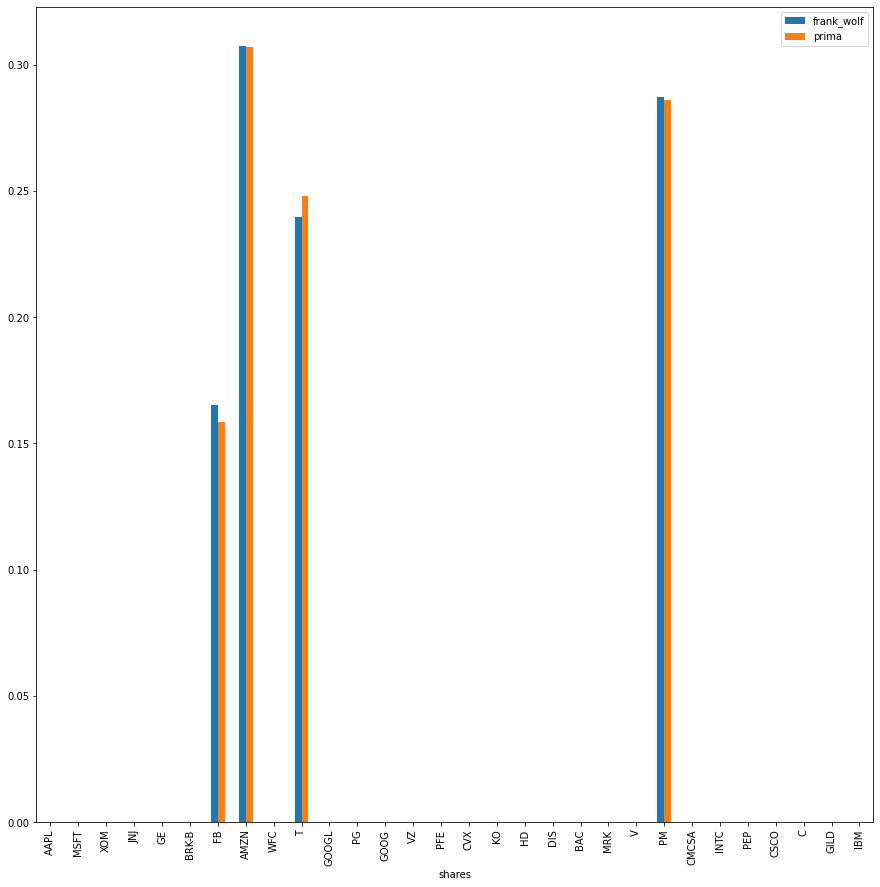

In [16]:
res_df.plot(x="shares", y=["frank_wolf", "prima"], kind="bar", figsize=(15,15))

### Vergleich

Man erkennt in der oberen Grafik, dass die Lösungen gleich sind bis auf eine kleine Differenz. Die Diskrepanz kommt dadurch zustande, dass in unserem Algortihmus mehr Iterationen durchgeführt werden als in primalen Version.

Der optimal Wert des Optimierungsproblem ist null. Dies war unter bertracht von Aufgabenteil b) zu erwarten, da unsere Zielfunktion gleichmäßig konvex ist und nicht an der y-Achse verschoben ist.